In [2]:
import pandas as pd
import matplotlib.pyplot as plt
ri = pd.read_csv('traffic.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
ri.stop_outcome.value_counts()


Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [4]:
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))


Speeding               48424
Moving violation       16224
Equipment              10922
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559563
Moving violation       0.187476
Equipment              0.126209
Other                  0.050960
Registration/plates    0.042790
Seat belt              0.033002
Name: violation, dtype: float64


In [5]:
# Create a DataFrame of female drivers
female =ri[ri['driver_gender']=='F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender']=='M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize = True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize = True))


Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


## Comparing search rates by gender


In [6]:
print(ri[ri['driver_gender']== "F"].search_conducted.mean())
print(ri[ri['driver_gender']== "M"].search_conducted.mean())

0.019180617481282074
0.04542557598546892


In [7]:
#in one step
print(ri.groupby('driver_gender').search_conducted.mean())
####  Male are searched more than twice as often as female drivers


driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Does gender affect who is frisked during a search?


In [8]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains( "Protective Frisk", na=False)

# Check the data type of 'frisk'
print(ri['frisk'].dtypes)

# Take the sum of 'frisk'
print(ri['frisk'].sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [9]:
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


for men is higher than wommen

In [10]:
ri['stop_time'].dtype
combined =ri.stop_time.str.cat(ri.stop_time, sep=' ')
combined
ri['date_and_time'] = pd.to_datetime(combined)
ri.set_index('date_and_time', inplace=True)


In [11]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()


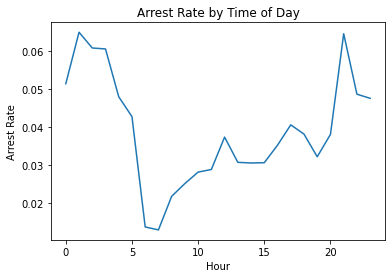

In [12]:
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()
# arrast rate increase in night 

In [13]:
print(ri.head())

                    state   stop_date stop_time  county_name driver_gender  \
date_and_time                                                                
2022-02-22 12:55:00    RI  2005-01-04     12:55          NaN             M   
2022-02-22 23:15:00    RI  2005-01-23     23:15          NaN             M   
2022-02-22 04:15:00    RI  2005-02-17     04:15          NaN             M   
2022-02-22 17:15:00    RI  2005-02-20     17:15          NaN             M   
2022-02-22 01:20:00    RI  2005-02-24     01:20          NaN             F   

                    driver_race                   violation_raw  violation  \
date_and_time                                                                
2022-02-22 12:55:00       White  Equipment/Inspection Violation  Equipment   
2022-02-22 23:15:00       White                        Speeding   Speeding   
2022-02-22 04:15:00       White                        Speeding   Speeding   
2022-02-22 17:15:00       White                Call for Service

In [14]:
ri.drugs_related_stop

date_and_time
2022-02-22 12:55:00    False
2022-02-22 23:15:00    False
2022-02-22 04:15:00    False
2022-02-22 17:15:00    False
2022-02-22 01:20:00    False
                       ...  
2022-02-22 21:21:00    False
2022-02-22 21:59:00    False
2022-02-22 22:04:00    False
2022-02-22 22:09:00    False
2022-02-22 22:47:00    False
Name: drugs_related_stop, Length: 91741, dtype: bool

date_and_time
2022-12-31    0.009396
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


C:\Users\ayama\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1200: UserWarning: Attempting to set identical left == right == 52.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


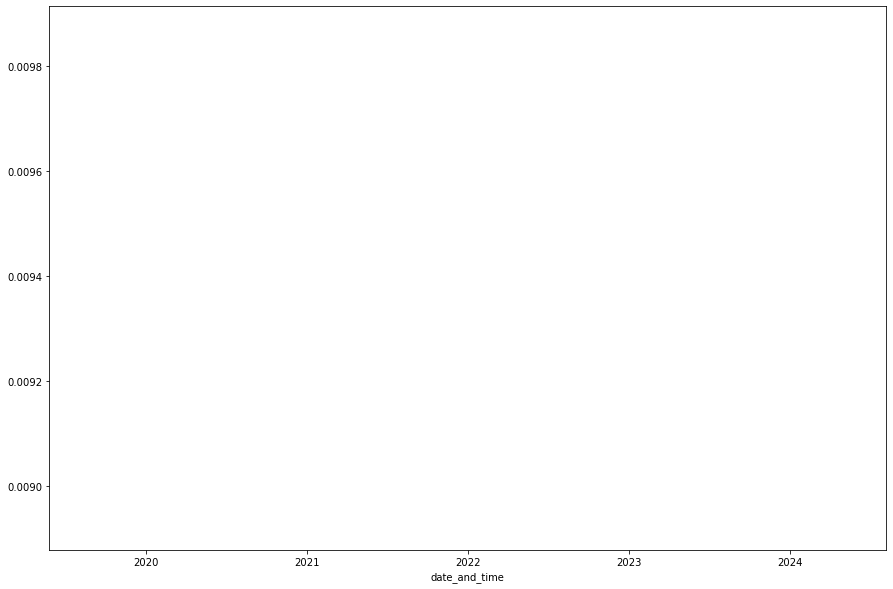

In [39]:
print(ri.drugs_related_stop.resample("A").mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

# Create a line plot of '
annual_drug_rate.plot(figsize=(15,10))

# Display the plot
plt.show()

C:\Users\ayama\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1200: UserWarning: Attempting to set identical left == right == 52.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\ayama\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1200: UserWarning: Attempting to set identical left == right == 52.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


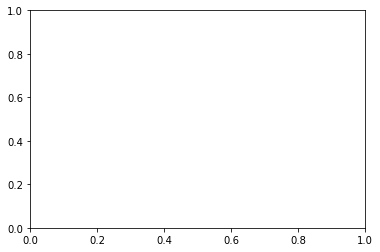

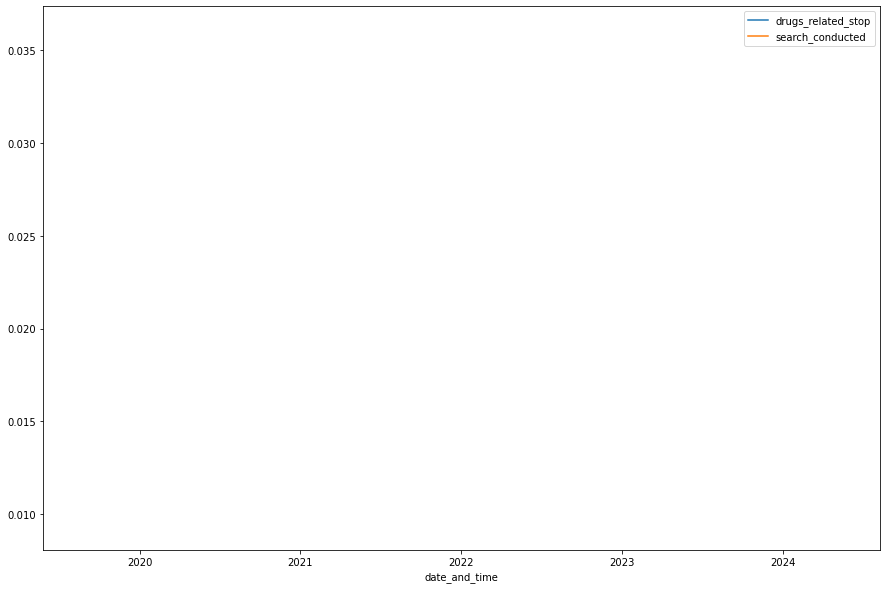

In [41]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()
ax,fig = plt.subplots()
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')
annual.plot(figsize=(15,10))
# Display the subplots
plt.show()

What violations are caught in each district?


violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

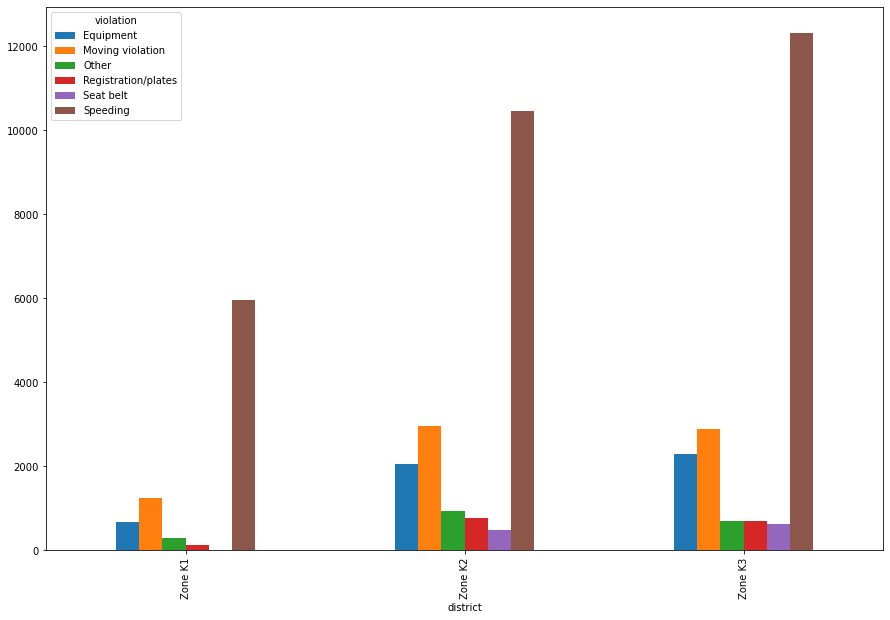

In [46]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district,ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district,ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1' : 'Zone K3'])

# Save the smaller table as 'k_zones'
kzones = all_zones.loc['Zone K1' : 'Zone K3']
kzones.plot(kind = 'bar',figsize=(15,10))


# Display the plot
plt.show()

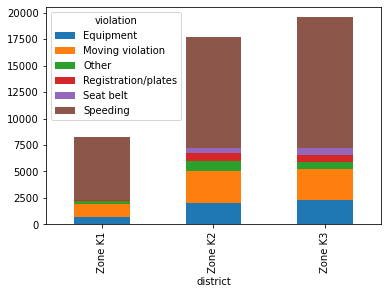

In [47]:
kzones.plot(kind = 'bar',stacked = True)


# Display the plot
plt.show()

Interesting! The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

How long might you be stopped for a violation?


In [48]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


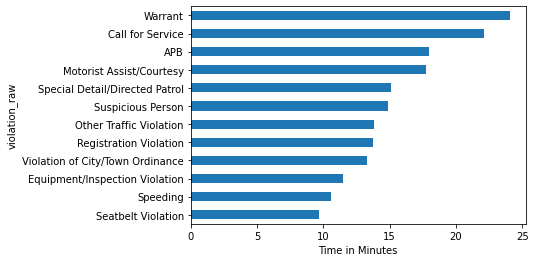

In [51]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
fig, ax = plt.subplots()
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')
ax.set_xlabel("Time in Minutes")

# Display the plot
plt.show()